# Speaker Diarization

Speaker Diarization is defined as the process of segmenting the input speech signal and grouped the homogenous regions with regard to the speaker identity. The main idea behind this system is that it is able to discriminate the speaker signal by assigning the label of the each speaker signal.

In [50]:
# import packages
import librosa
from librosa.display import specshow
import python_speech_features
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# audio file path
audio_file = './sample.wav'

In [3]:
# samples from audio file
samples,sample_rate = librosa.core.load(audio_file,sr=16000, mono= True)

In [4]:
samples.shape

(960000,)

In [5]:
# Timeline of audio file with samples
time_line = np.arange(0,len(samples))/sample_rate

In [6]:
print(time_line)

[0.00000000e+00 6.25000000e-05 1.25000000e-04 ... 5.99998125e+01
 5.99998750e+01 5.99999375e+01]


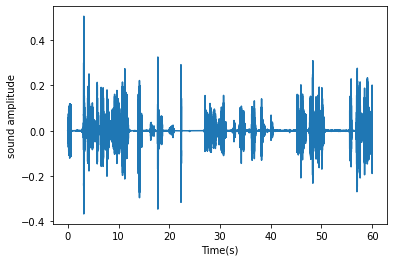

In [7]:
# plot samples
fig, ax = plt.subplots()
ax.plot(time_line,samples)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()

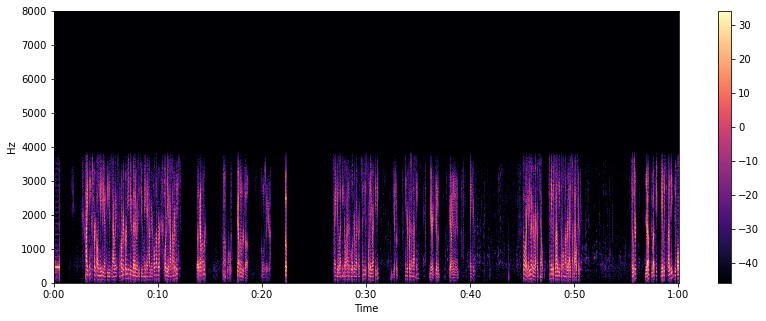

In [51]:
#display Spectrogram
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [58]:
# Get MFCC features from samples
winstep = 0.01  # happens to be the default value
features,energy = python_speech_features.fbank(signal=samples,samplerate=sample_rate, winstep=winstep,nfilt=26)

In [59]:
features.shape

(5999, 26)

In [60]:
# Timeline of features
frame_rate = 1./winstep
timeline_mfcc = np.arange(0, len(features))/frame_rate

In [61]:
print(timeline_mfcc)

[0.000e+00 1.000e-02 2.000e-02 ... 5.996e+01 5.997e+01 5.998e+01]


In [78]:
# # plot mfcc features
# fig, ax = plt.subplots()
# ax.plot(timeline_mfcc,features)
# ax.set(xlabel='Time(s)',ylabel='sound amplitude')
# plt.show()

In [79]:
# from librosa.display import specshow
# # mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
# # print(mfccs.shape)
# #Displaying  the MFCCs:
# specshow(features, sr=sample_rate, x_axis='time')

In [64]:
from spectralcluster import SpectralClusterer

In [65]:
# perform clustering
clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=100,
    p_percentile=0.95,
    gaussian_blur_sigma=1)

labels = clusterer.predict(features)

In [66]:
print(labels)

[0 0 0 ... 0 0 0]


In [67]:
len(labels)

5999

In [68]:
set(labels)

{0, 1}

In [69]:
# create dictionary of time and label 
lables_timline = {str(time):int(label) for (time,label) in zip(timeline_mfcc,labels)}

In [70]:
# import json
# with open('speaker_diarization_output.json','w') as fp:
#     json.dump(lables_timline,fp)

In [71]:
# get speaker time slots
begin = list()
end = list()
segment = list()
status_0 = True
status_1 = True
time_list = list(lables_timline.keys()) 
for index,(time, label) in enumerate(lables_timline.items()):
    if label == 0:
        if status_0:
            begin.append(float(time))
            segment.append(f"Speaker-{label}")
            if not status_1:
                end.append(float(time_list[index-1]))
            status_0 = False
            status_1 = True
    elif label == 1:
        if status_1:
            begin.append(float(time))
            segment.append(f"Speaker-{label}")
            if not status_0:
                end.append(float(time_list[index-1]))
            status_1 = False
            status_0 = True
    if index == len(time_list)-1:
        end.append(float(time))

In [72]:
begin

[0.0,
 20.92,
 22.28,
 22.55,
 23.98,
 24.02,
 26.87,
 27.9,
 27.91,
 28.52,
 28.53,
 46.98,
 46.99]

In [73]:
end

[20.91,
 22.27,
 22.54,
 23.97,
 24.01,
 26.86,
 27.89,
 27.9,
 28.51,
 28.52,
 46.97,
 46.98,
 59.98]

In [74]:
segment

['Speaker-0',
 'Speaker-1',
 'Speaker-0',
 'Speaker-1',
 'Speaker-0',
 'Speaker-1',
 'Speaker-0',
 'Speaker-1',
 'Speaker-0',
 'Speaker-1',
 'Speaker-0',
 'Speaker-1',
 'Speaker-0']

### Plot Speaker lable with time line

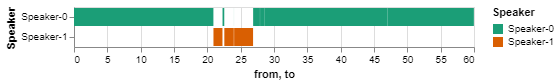

In [82]:
import altair as alt
import datetime as dt
import pandas as pd


alt.renderers.enable('jupyterlab')

data = pd.DataFrame()
data['from'] = begin
data['to'] = end
data['Speaker'] = segment
#data

alt.Chart(data).mark_bar().encode(
    x='from',
    x2='to',
    y='Speaker',
    color=alt.Color('Speaker', scale=alt.Scale(scheme='dark2'))
)

## Reference

https://github.com/wq2012/SpectralCluster

https://google.github.io/speaker-id/publications/LstmDiarization/

https://www.youtube.com/watch?v=TBSWv3mJ0Nc

https://www.youtube.com/watch?v=FhPI5lbyz-I

https://github.com/google/uis-rnn

https://github.com/wq2012/awesome-diarization

https://github.com/FlorianKrey/DNC

https://github.com/taylorlu/Speaker-Diarization

https://github.com/WeidiXie/VGG-Speaker-Recognition

https://github.com/tyiannak/pyAudioAnalysis

https://ai.googleblog.com/2018/11/accurate-online-speaker-diarization.html

https://stackoverflow.com/questions/51505291/timeline-bar-graph-using-python-and-matplotlib

https://github.com/jim-schwoebel/voice_datasets